# FFT Example 1

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


In [2]:
def ready_2_show(a, level=255):
    a = ( a - np.min(a) ) / (np.max(a) - np.min(a)) 
    a = a * level
    return np.uint8(a)


(Text(0.5, 1.0, 'Input Image'), ([], []), ([], []))

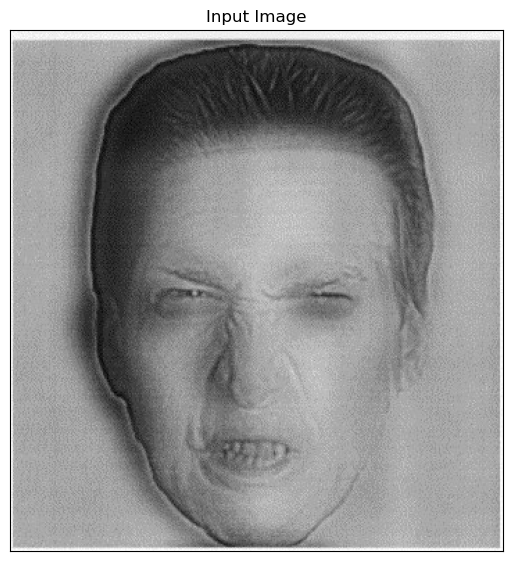

In [3]:
'''
TEST IMAGES: 
img = cv.imread('high_spat_freq.bmp', 0)
img = cv.imread('low_spat_freq.bmp', 0) 
img = cv.imread('vertical_texture.bmp', 0)
img = cv.imread('diag_texture.bmp', 0)
img = cv.imread('IMG_plain.JPG', 0) 
img = cv.imread('hor_texture.jpg ', 0)

'''

img = cv.imread('..\\1s20r1.jpg',0)
# 0 means reading as a graylevel image

plt.figure(figsize=(14,10))
plt.subplot(121) , plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])


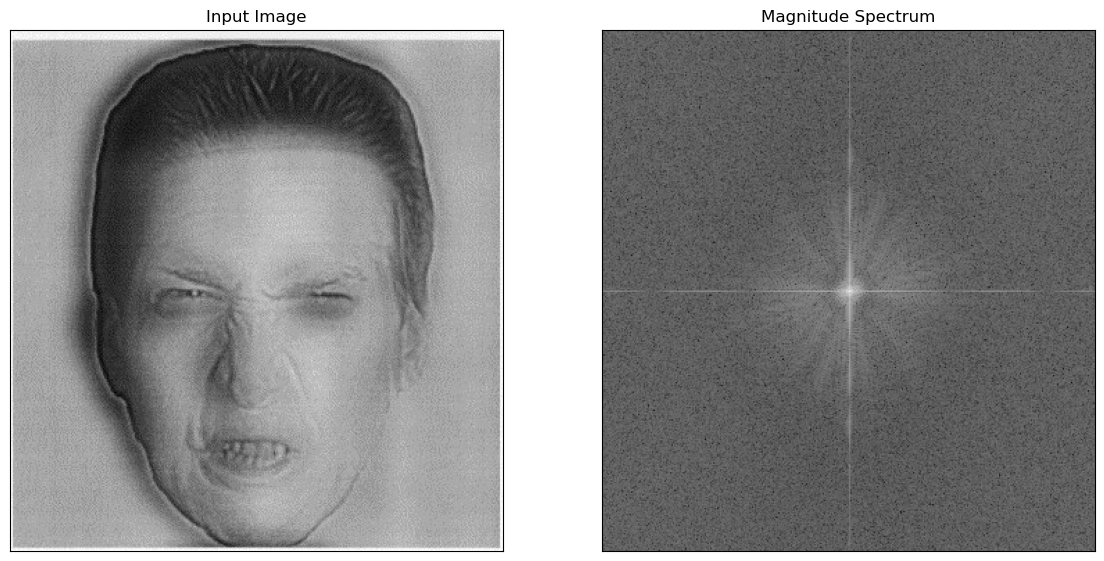

In [4]:
# Computing FFT and shifting that
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
# log scale * 80 for visualization
magnitude_spectrum = 80*np.log(np.abs(fshift))

plt.figure(figsize=(14,10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
# without fft shifting
# f[0,0] is equal to the summation of all the pixels of the image
# f[50,50] is a complex number

print( f[0,0] ,'\t', f[50,50] ,'\t' , img.sum() ) 

(18920132+0j) 	 (-1744.7534898643878+3069.473706529596j) 	 18920132


In [6]:
# FFT phase matrix

phas = np.angle(fshift)

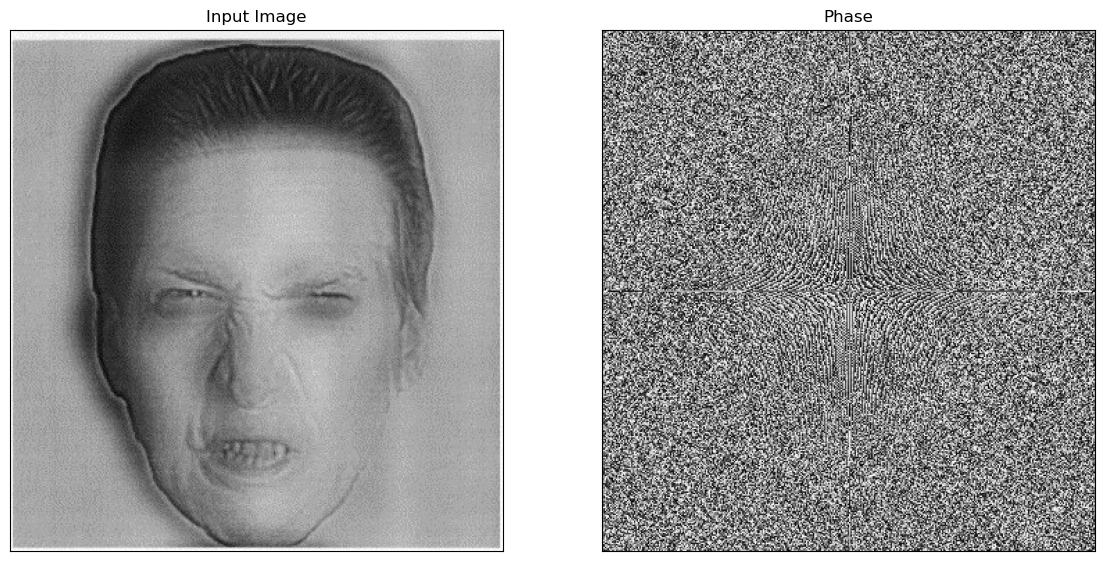

In [7]:
plt.figure(figsize=(14,10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(phas, cmap = 'gray')
plt.title('Phase'), plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
phas

array([[-3.14159265, -0.77864931, -0.24009498, ..., -0.77766012,
         0.24009498,  0.77864931],
       [-0.66308475, -0.77753217, -2.90677414, ...,  1.688777  ,
         1.97260549,  2.65777784],
       [ 0.285015  , -0.71011678,  2.51765529, ..., -0.2833777 ,
        -2.27874526,  0.57955347],
       ...,
       [-1.0039092 ,  3.06354427, -2.40712437, ..., -1.84056686,
        -2.68772722, -1.36484811],
       [-0.285015  , -0.57955347,  2.27874526, ..., -2.91057317,
        -2.51765529,  0.71011678],
       [ 0.66308475, -2.65777784, -1.97260549, ..., -0.30850218,
         2.90677414,  0.77753217]])

In [9]:
magnitude_spectrum

array([[634.30130573, 640.34649272, 703.4149478 , ..., 579.64433422,
        703.4149478 , 640.34649272],
       [506.38368277, 665.68000454, 651.57274013, ..., 660.06562514,
        642.77643838, 693.88831952],
       [615.13707891, 464.04414962, 685.6067633 , ..., 696.36784329,
        645.9208901 , 485.08247633],
       ...,
       [598.74330351, 679.61427796, 713.80239986, ..., 645.35488133,
        601.29436939, 652.35454308],
       [615.13707891, 485.08247633, 645.9208901 , ..., 713.37384902,
        685.6067633 , 464.04414962],
       [506.38368277, 693.88831952, 642.77643838, ..., 651.75236546,
        651.57274013, 665.68000454]])

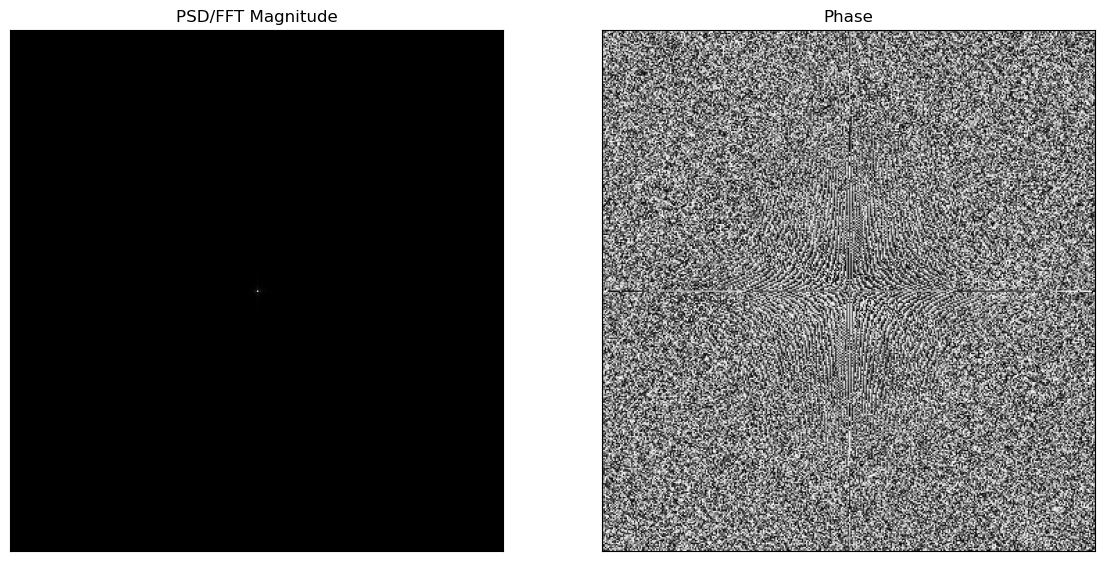

In [11]:
# showing the shifted magnitude and phase of the FFT

plt.figure(figsize=(14,10))
plt.subplot(121),plt.imshow(ready_2_show(np.abs(fshift)), cmap = 'gray')
plt.title('PSD/FFT Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(ready_2_show(phas), cmap = 'gray')
plt.title('Phase'), plt.xticks([]), plt.yticks([])
plt.show()

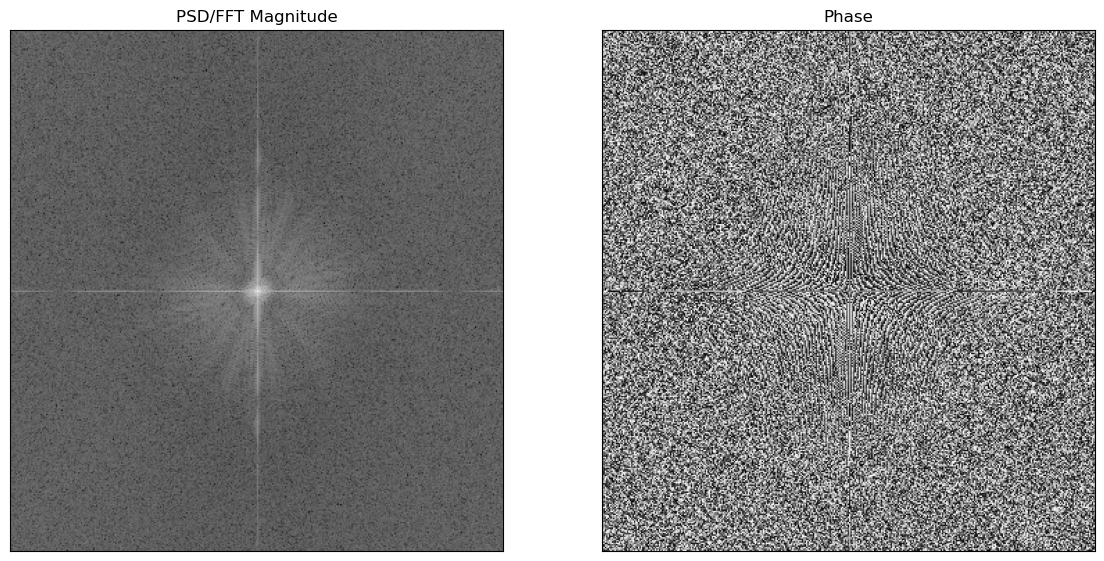

In [12]:
# showing the shifted log magnitude and phase of the FFT

plt.figure(figsize=(14,10))
plt.subplot(121),plt.imshow(ready_2_show(np.log( np.abs(fshift)) ), cmap = 'gray')
plt.title('PSD/FFT Magnitude, Log Scale'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(ready_2_show(phas), cmap = 'gray')
plt.title('Phase'), plt.xticks([]), plt.yticks([])
plt.show()